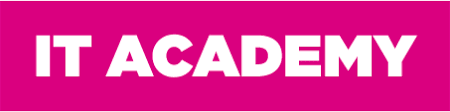

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Ingesta y Transformación Dataset con Python</u></b></center></font>
    
$%$       
\begin{align*}Alex\:Kumenius\end{align*}
\begin{align*}Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\hspace{2mm}Project\hspace{2mm}Integrator\end{align*}
$%$       
\begin{align*}Date : Gener\hspace{2mm},2021\end{align*}</div>

# <span style=color:darkblue>INGESTA Y TRANSFORMACIÓN DATASET</span>

Se dedica una cantidad significativa de tiempo para la preparación del dato :

1. Cargar / Ingesta,
2. Limpiar,
3. Transformar y
4. Reorganizar

Alrededor del 80% o más del tiempo de dedicación de un Data Scientist.

## <span style=color:green><ins>Configuración Entorno de Trabajo</ins></span>

In [1]:
# Importamos librerias necesarias
import os
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Mostrar el directorio de trabajo
print(os.getcwd())
# os.getcwd()

C:\Users\INTEL\Documents\TOOLBOX


In [3]:
# Establecer nuevo directorio de trabajo a la carpeta Proyecto/Data/RawData

RData = 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata'
os.chdir(RData)

In [4]:
# Verificamos el nuevo directorio de trabajo

print(os.getcwd())

D:\Documents\EureCat\Formacion\Eurecat 2019\Programa Formacion Violeta\Projecto\Data\Rawdata


In [5]:
# Mostrar archivos del directorio
os.listdir(os.curdir)

['baltimore (1).html',
 'baltimore (1).json',
 'baltimore.html',
 'baltimore.json',
 'BaltimoreDraft_1.csv',
 'baltimore_1.csv',
 'baltimore_2.csv',
 'baltimore_3 (1).csv',
 'baltimore_3.csv',
 'baltimore_Alex.csv',
 'baltimore_Alex101.csv',
 'chiporders.csv',
 'contact.json',
 'GlobalTerrorismCodebook.pdf',
 'globalterrorismdb_0617dist.csv',
 'GRUPO Traffic BCN',
 'gtd.zip',
 'Save Dataset Baltimore',
 'Science Articles',
 'Tweets Analisis Gnrales 2019',
 'uforeports.csv',
 'user_logs.csv.7z']

---

## <span style=color:green><ins>Ingesta Fuentes de Datos</ins></span>

[Baltimore Camera Data](https://data.baltimorecity.gov/Transportation/Baltimore-Fixed-Speed-Cameras/dz54-2aru)

### <span style=color:blue> Con libreria urllib</ins></span>

In [6]:
import urllib

In [7]:
url = "https://data.baltimorecity.gov/resource/dz54-2aru.csv"

In [8]:
archivo = urllib.request.urlopen(url)

HTTPError: HTTP Error 404: Not Found

In [10]:
descarga = archivo.read()

NameError: name 'archivo' is not defined

In [9]:
with open('D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore_Alex.csv', 'wb') as f:
    f.write(descarga)

NameError: name 'descarga' is not defined

---

### <span style=color:blue> Con libreria requests</ins></span>

In [ ]:
import requests
# pip install requests

In [ ]:
print('Inicio descarga de archivo con requests...')

In [ ]:
url = 'https://data.baltimorecity.gov/api/views/dz54-2aru/rows.csv'

In [ ]:
r = requests.get(url)

In [ ]:
file = 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore_1.csv'

In [ ]:
with open(file, 'wb') as f:
    f.write(r.content)

In [ ]:
# Podemos Extraemos HTTP meta-data
print(r.status_code)

In [ ]:
print(r.headers['content-type'])

In [ ]:
print(r.encoding)

In [ ]:
# Mostrar archivos del directorio
os.listdir(os.curdir)

---

### <span style=color:blue> Con libreria wget</ins></span>

In [ ]:
# instalamos la libreria 'wget'
# !pip3 install wget

In [ ]:
import wget

In [ ]:
# apuntamos a la url para bajar archivo 'csv'
url_csv = 'https://data.baltimorecity.gov/api/views/dz54-2aru/rows.csv'
save_csv = 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore_3.csv'

In [ ]:
# wget.download(url_csv, 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore_2.csv')
wget.download(url_csv, save_csv)

In [ ]:
# apuntamos a la url para bajar archivo 'json'
url_json = 'https://data.baltimorecity.gov/api/views/dz54-2aru/rows.json'

In [ ]:
wget.download(url_json, 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore.json')

In [ ]:
url_html = 'https://data.baltimorecity.gov/api/views/dz54-2aru/rows.html'

In [ ]:
wget.download(url_html, 'D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore.html')

In [ ]:
# Mostrar archivos del directorio
os.listdir(os.curdir)

---

# <span style=color:darkblue><ins>EXPLORACION Y TRANSFORMACIOM DATASET</ins></span>

## <span style=color:green><ins>[Pandas' Input/Output](https://pandas.pydata.org/pandas-docs/version/0.22/api.html#input-output)</ins></span>

In [11]:
# leemos el archivo del dataset 
Baltimore = pd.read_csv('D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\\Rawdata\\baltimore_1.csv', sep=',')

In [12]:
# buscamos el tipo de estructura del dataset
type(Baltimore)

pandas.core.frame.DataFrame

In [13]:
# miramos la dimensión del dataset
Baltimore.shape

(80, 9)

In [14]:
# dimensión del dataset
Baltimore.ndim

2

In [18]:
# Verificamos las opciones de visualización del nº de columnas
pd.get_option('display.max_columns')

In [19]:
# Verificamos las opciones de visualización del nº de columnas
pd.set_option('display.max_columns', None)

In [20]:
# Si queremos visualizar todas las filas del data frame. Necesitamos configurar value como NONE 
# Code to set the property display.max_rows to None
pd.set_option('display.max_rows', None)

In [21]:
# configurar código para establecer display.max_rows a una linea/row mas que el total
pd.set_option('display.max_rows', Baltimore.shape[0]+1)

In [22]:
Baltimore.shape[0]

80

In [ ]:
# Modificamos nº de columnas a visualizar
pd.set_option('display.max_columns',8)

In [24]:
# extraemos las variables del dataset ó nombre de las columnas
Baltimore.columns

Index(['address', 'direction', 'street', 'crossStreet', 'intersection',
       'Location 1', '2010 Census Neighborhoods',
       '2010 Census Wards Precincts', 'Zip Codes'],
      dtype='object')

In [27]:
# Visualizamos el dataset
Baltimore.head()

,address,direction,street,crossStreet,intersection,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,GARRISON BLVD & WABASH AVE,E/B,Garrison \n,Wabash Ave,Garrison \n & Wabash Ave,"(39.341209, -76.683117)",252,63,27295
1,HILLEN ST & FORREST ST,W/B,Hillen \n,Forrest St,Hillen \n & Forrest St,"(39.29686, -76.605532)",179,108,13645
2,EDMONDSON AVE & N ATHOL AVE,E/B,Edmonson\n,Woodbridge Ave,Edmonson\n & Woodbridge Ave,"(39.293453, -76.689391)",213,75,27950
3,YORK RD & GITTINGS AVE,S/B,York Rd \n,Gitting Ave,York Rd \n & Gitting Ave,"(39.370493, -76.609812)",37,270,14009
4,RUSSELL ST & W HAMBURG ST,S/B,Russell\n,Hamburg St,Russell\n & Hamburg St,"(39.279819, -76.623911)",250,178,27953


In [28]:
# Miramos el tipo de dato
Baltimore.dtypes

address                        object
direction                      object
street                         object
crossStreet                    object
intersection                   object
Location 1                     object
2010 Census Neighborhoods       int64
2010 Census Wards Precincts     int64
Zip Codes                       int64
dtype: object

In [29]:
# Visualizamos el dataset de una forma mas resumida.info()
Baltimore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
address                        80 non-null object
direction                      80 non-null object
street                         80 non-null object
crossStreet                    80 non-null object
intersection                   80 non-null object
Location 1                     80 non-null object
2010 Census Neighborhoods      80 non-null int64
2010 Census Wards Precincts    80 non-null int64
Zip Codes                      80 non-null int64
dtypes: int64(3), object(6)
memory usage: 5.7+ KB


In [30]:
Baltimore.describe().round(2)

,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
count,80.00,80.00,80.00
mean,141.26,152.56,23866.68
std,74.76,86.99,6198.28
min,6.00,1.00,13642.00
25%,76.00,75.75,14009.00
50%,148.00,155.00,27297.00
75%,203.00,238.00,27937.50
max,269.00,289.00,28570.00


In [31]:
Baltimore.describe(include = "all")

,address,direction,street,crossStreet,intersection,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
count,80,80,80,80,80,80,80.000000,80.000000,80.000000
unique,71,4,61,66,74,76,NaN,NaN,NaN
top,GWYNNS FLS & GARRISON BLVD,E/B,Northern Pkwy,Hamburg St,Gwynns Falls \n & Garrison Blvd,"(39.313579, -76.676225)",NaN,NaN,NaN
freq,2,24,4,2,2,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,141.262500,152.562500,23866.675000
std,NaN,NaN,NaN,NaN,NaN,NaN,74.757286,86.994521,6198.278762
min,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,13642.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,76.000000,75.750000,14009.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,148.000000,155.000000,27297.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,203.000000,238.000000,27937.500000


In [32]:
# Buscando Missing Values
# verificando cuales son NaN (True) usando isnull
# devuele un DataFrame de True's y False's
Baltimore.isnull()
# Baltimore.isnull().head()

,address,direction,street,crossStreet,intersection,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [35]:
# Contamos el numero de Missing values en cada columna suma True's
(Baltimore.isnull().sum())*100 / len(Baltimore)

address                        0.0
direction                      0.0
street                         0.0
crossStreet                    0.0
intersection                   0.0
Location 1                     0.0
2010 Census Neighborhoods      0.0
2010 Census Wards Precincts    0.0
Zip Codes                      0.0
dtype: float64

In [36]:
# data.notnull().tail()
# data.notnull()
Baltimore.notnull().head()

,address,direction,street,crossStreet,intersection,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True


In [38]:
(Baltimore.notnull().sum())*100 /len(Baltimore)

address                        100.0
direction                      100.0
street                         100.0
crossStreet                    100.0
intersection                   100.0
Location 1                     100.0
2010 Census Neighborhoods      100.0
2010 Census Wards Precincts    100.0
Zip Codes                      100.0
dtype: float64

# <span style=color:darkblue><ins>TIDY DATA - LIMPIAR EL DATO</ins></span>

<span style=color:blue>Missing data / Falta de dato</span> es muy habitual en el proceso del Análisis del dato.

La representación de <span style=color:blue>Missing Data</span> se determina, para datos numéricos, con el <span style=color:blue>valor float point <strong>NaN</strong></span> (Not a Number -- No un Numero). 

Lo llamamos <span style=color:blue><b>Valor Centinela - Sentinel Value</b></span> que puede ser facilmente detectado.

No referiremos a <span style=color:blue>Missing Data</span> como <span style=color:blue><b>NA</b></span>, que significa <span style=color:blue>No Disponible <b>(Not Available)</b></span>. 

En aplicaciones estádisticas, <span style=color:blue><b>NA</b> data</span> puede ser :

- data que <b>no</b> <u>existe</u> o 
- que <u>existe</u> pero <b>no fue observada</b> ( <i>debido a problemas en la recopilación del dato</i> ).

Cuando limpiamos los datos para su análisis, es importante <b>analizar las variables</b> que contengan <span style=color:blue><b>NA</b> values</span> para : 

- identificar problemas en la recopilación de datos, 
- identificar origen, 
- sesgos potenciales en el dato causados por <span style=color:blue><b>NA</b> values</span>,
- ...

In [39]:
dataS1 = ['zebra', 'alcachofa', np.nan, 'aguacate']
type(dataS1)

list

In [40]:
dataS1

['zebra', 'alcachofa', nan, 'aguacate']

In [41]:
# Creamos y asignamos una Serie de valores a la variable dataS
dataS = pd.Series(['zebra', 'alcachofa', np.nan, 'aguacate'])
dataS

0        zebra
1    alcachofa
2          NaN
3     aguacate
dtype: object

In [44]:
(dataS.isnull().sum()*100) / len(dataS)

25.0

<span style=color:darkred><b>None</b> values</span> tambien se tratan como <span style=color:blue><b>NA</b></span> en matrices (arrays) de objectos :

In [45]:
dataS[2:4]

2         NaN
3    aguacate
dtype: object

In [46]:
dataS[0] = None
dataS

0         None
1    alcachofa
2          NaN
3     aguacate
dtype: object

In [47]:
dataS.isnull()

0     True
1    False
2     True
3    False
dtype: bool

Otras funciones (methods) utilizados en la Gestion de Missing Data :

- <span style=color:blue><b>dropna()</b></span> : Filter axis labels based on whether values for each label have missing data, with varying thresholds for how
    much missing data to tolerate.
- <span style=color:blue><b>fillna()</b></span> : Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.
- <span style=color:blue><b>isnull()</b></span>  : Return boolean values indicating which values are missing/NA.
- <span style=color:blue><b>notnull()</b></span> : Negation of isnull.

## <span style=color:green><ins>Tratamiento Missing Data -- Filter Out Missing Data</ins></span>

Existen varias manera de tratar con <span style=color:blue>NA data</span> :

- Eliminar <span style=color:blue><b>NaN Values</b></span> en filas/rows o columnas/columns o,
- Poblar o Imputar valores específicos en <span style=color:blue><b>Missing Data()</b></span>

### <span style=color:darkred><ins>Método 1.- Eliminar Missing values - Series</ins></span>

#### <span style=color:blue>dropna() method</span>

Aplicar <span style=color:blue><b>dropna()</b></span> en <b>Series objects</b>, nos devolvera la Series con sólo los <span style=color:blue>non-null data</span> y <span style=color:blue>index values</span> :

In [48]:
data = pd.Series([1, np.nan, 4, 75, 5, 7, np.nan])

In [49]:
# Estructura / dimension de la Serie
print('dimension de la Serie :', data.shape), print('Data Strucutre :', type(data))

dimension de la Serie : (7,)
Data Strucutre : <class 'pandas.core.series.Series'>


(None, None)

In [50]:
data.isnull()

0    False
1     True
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
# Selecionar Valores Not Null, indexación Boleana
data.notnull()

In [51]:
# Selecionar Valores Not Null, mostrando valores.
# Podemos crear, por asignacion de variables, a una nueva Serie
Missing_Value = data[data.isnull()]

In [52]:
Missing_Value

1   NaN
6   NaN
dtype: float64

In [53]:
# o Eliminamos utilizando dropna()
data.dropna()

0     1.0
2     4.0
3    75.0
4     5.0
5     7.0
dtype: float64

### <span style=color:darkred><ins>Método 1.- Eliminar Missing values - DataFrame</ins></span>

#### <span style=color:blue>dropna() method</span>

Aplicar <span style=color:blue><b>dropna()</b></span> en <b>Dataframes objects</b>, podemos decidir eliminar filas/rows o columnas/columns que :

- todos sus valores son NA o,
- solo esas filas o columnas que contengan algun NA.

nos devolvera sólo los <span style=color:blue>non-null data</span> e <span style=color:blue>index values</span>.

In [54]:
# creamos un DataFrame
data = pd.DataFrame([[2, 8,3, 4.5], [1., np.nan, np.nan],
                   [np.nan, np.nan, np.nan], [np.nan, 5.9, 3]])
data

,0,1,2,3
0,2.0,8.0,3.0,4.5
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN


<span style=color:blue><b>dropna()</b></span> elimina, por defecto, cualquier <span style=color:blue>fila/row</span> que contenga los <span style=color:red>Null o Nan values</span> :

In [55]:
# Eliminamos fila/row que contengan Nan values :
cleaned = data.dropna()
cleaned

,0,1,2,3
0,2.0,8.0,3.0,4.5


Otra sintaxis equivalente, incluyendo el parametro <span style=color:darkred><u>how = <b>'any'</b></u></span>, <u>valor por defecto</u> en el método <span style=color:blue>dropna()</span> :

In [56]:
# eliminamos Missing values
# how='any' es el default
data.dropna(axis = 0, how='any')

,0,1,2,3
0,2.0,8.0,3.0,4.5


In [57]:
data

,0,1,2,3
0,2.0,8.0,3.0,4.5
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN


Si modificamos el parametro por defecto a <span style=color:darkred><u>how = <b>'all'</b></u></span>, en el método <span style=color:blue>dropna()</span>, eliminaremos <b>SOLO</b> aquellas <span style=color:blue>filas/rows</span> que son todas <span style=color:red>NA values</span> :

In [58]:
# Eliminamos filas si todos sus valores son missing values
data_Final = data.dropna(how = 'all')

In [59]:
data_Final

,0,1,2,3
0,2.0,8.0,3.0,4.5
1,1.0,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN


De la misma manera, podemos eliminar <b>columnas</b> con valores NA, <i>totales o parciales</i>, utilizando el parametro <span style=color:darkred><b>axis = 1</b></span>

In [60]:
# Añadimos una 4ª columna con todos sus valores NA.
data[4] = np.nan
# data['Col 4']
# del data['Col 4']

In [62]:
data.dropna(axis = 1, how = 'all')

,0,1,2,3
0,2.0,8.0,3.0,4.5
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN


In [61]:
data

,0,1,2,3,4
0,2.0,8.0,3.0,4.5,NaN
1,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN,NaN


Supongamos que queremos solamente mantener filas/rows que contengan un cierto número de Observaciones. Podemos realizarlo con el argumento ``thresh``:

In [63]:
data_1 = pd.DataFrame(np.random.randn(7, 3))
data_1

,0,1,2
0,-0.215221,-1.185541,1.324987
1,-0.338709,0.533613,-0.408200
2,-2.028696,0.323844,2.042388
3,0.381917,0.710489,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


In [64]:
data_1.iloc[:4, 1]

0   -1.185541
1    0.533613
2    0.323844
3    0.710489
Name: 1, dtype: float64

In [65]:
data_1.iloc[:4, 1] = np.nan

In [66]:
data_1.iloc[:4, 1]

0   NaN
1   NaN
2   NaN
3   NaN
Name: 1, dtype: float64

In [67]:
data_1

,0,1,2
0,-0.215221,NaN,1.324987
1,-0.338709,NaN,-0.408200
2,-2.028696,NaN,2.042388
3,0.381917,NaN,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


In [68]:
data_1.iloc[:2, 2] = np.nan

In [69]:
data_1

,0,1,2
0,-0.215221,NaN,NaN
1,-0.338709,NaN,NaN
2,-2.028696,NaN,2.042388
3,0.381917,NaN,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


<span style=color:red>Utilizar condiciones de eliminación si ciertos criterios se cumplen :</span>

In [ ]:
data_1

In [71]:
# Eliminamos filas si ambas columnas 0 y 1 son NA values

data_1.dropna(subset=[1, 2], how='all')

,0,1,2
2,-2.028696,NaN,2.042388
3,0.381917,NaN,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


In [73]:
# Eliminamos filas si ambos street y crossStreet son NA values

Baltimore.dropna(subset=['street', 'crossStreet'], how='all').shape

(80, 9)

In [72]:
Baltimore.head()

,address,direction,street,crossStreet,intersection,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,GARRISON BLVD & WABASH AVE,E/B,Garrison \n,Wabash Ave,Garrison \n & Wabash Ave,"(39.341209, -76.683117)",252,63,27295
1,HILLEN ST & FORREST ST,W/B,Hillen \n,Forrest St,Hillen \n & Forrest St,"(39.29686, -76.605532)",179,108,13645
2,EDMONDSON AVE & N ATHOL AVE,E/B,Edmonson\n,Woodbridge Ave,Edmonson\n & Woodbridge Ave,"(39.293453, -76.689391)",213,75,27950
3,YORK RD & GITTINGS AVE,S/B,York Rd \n,Gitting Ave,York Rd \n & Gitting Ave,"(39.370493, -76.609812)",37,270,14009
4,RUSSELL ST & W HAMBURG ST,S/B,Russell\n,Hamburg St,Russell\n & Hamburg St,"(39.279819, -76.623911)",250,178,27953


Podemos eliminar todos los NA values directamente en el DataFrame original, sin necesidad de crear un nuevo objecto, a traves de asignación de variables, introduciendo el parametro <span style=color:darkred>inplace =</span> <span style=color:green><b>True</b></span>

In [74]:
# DataFrame original
data_1

,0,1,2
0,-0.215221,NaN,NaN
1,-0.338709,NaN,NaN
2,-2.028696,NaN,2.042388
3,0.381917,NaN,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


In [ ]:
# eliminamos Missing values directamente en origen, sin asignación de variable.
data_1.dropna(how='all', inplace=True)

In [ ]:
data_1

### <span style=color:darkred><ins>Método 2.- Poblar o Imputar Missing values</ins></span>

En lugar de <span style=color:blue>eliminar los <b>NaN</b> values</span>, y <span style=color:red>potencialmente descartar</span> al mismo tiemo otros <span style=color:blue><u>datos relevantes</u> para el <b>análisis</b></span>. Podemos <span style=color:blue><b><i>"Poblarlos o Imputarles"</i></b></span> nuevos valores.

In [75]:
data_2 = pd.DataFrame(np.random.randn(7, 3))

In [76]:
data_2.iloc[:4, 1] = np.nan

In [77]:
data_2.iloc[:2, 2] = np.nan

In [78]:
data_2

,0,1,2
0,0.229448,NaN,NaN
1,-1.218617,NaN,NaN
2,-1.421873,NaN,-0.546779
3,0.342903,NaN,-0.807735
4,0.699595,2.017189,0.408872
5,-0.373732,-0.823289,0.980151
6,-1.335324,-1.005522,-0.004840


#### <span style=color:blue>fillna() method</span>

Utilizamos el método <span style=color:blue>fillna()</span> con una <b>constante</b> que sustituira <span style=color:blue>NaN/Null values</span> por el valor de la constante :

In [79]:
data_2.fillna(0)

,0,1,2
0,0.229448,0.000000,0.000000
1,-1.218617,0.000000,0.000000
2,-1.421873,0.000000,-0.546779
3,0.342903,0.000000,-0.807735
4,0.699595,2.017189,0.408872
5,-0.373732,-0.823289,0.980151
6,-1.335324,-1.005522,-0.004840


In [80]:
data_2

,0,1,2
0,0.229448,NaN,NaN
1,-1.218617,NaN,NaN
2,-1.421873,NaN,-0.546779
3,0.342903,NaN,-0.807735
4,0.699595,2.017189,0.408872
5,-0.373732,-0.823289,0.980151
6,-1.335324,-1.005522,-0.004840


Podemos utilizar <span style=color:blue>fillna()</span> con un diccionario ``dict``, usando diferentes valores para poblar cada columna :

In [81]:
data_2.fillna({1 : 0.74, 2 : 0.11})

,0,1,2
0,0.229448,0.740000,0.110000
1,-1.218617,0.740000,0.110000
2,-1.421873,0.740000,-0.546779
3,0.342903,0.740000,-0.807735
4,0.699595,2.017189,0.408872
5,-0.373732,-0.823289,0.980151
6,-1.335324,-1.005522,-0.004840


In [82]:
data_1

,0,1,2
0,-0.215221,NaN,NaN
1,-0.338709,NaN,NaN
2,-2.028696,NaN,2.042388
3,0.381917,NaN,-0.820508
4,0.624900,0.225749,-0.339122
5,-1.937204,0.580883,-1.260742
6,-0.073504,-0.570401,0.155594


In [97]:
dataf = data_1[1].fillna(value = 'VARIOUS')

In [107]:
type(dataf[0])

str

In [84]:
data_1.isnull().sum()

0    0
1    4
2    2
dtype: int64

In [108]:
# Contar valores de repeticion de una variables
Baltimore['street'].value_counts(dropna=False).head()

Northern Pkwy      4
Liberty Hghts\n    3
Park Heights       3
Harford \n         2
Franklin \n        2
Name: street, dtype: int64

In [109]:
# Verificación de Mising Values
# Baltimore['street'].isnull().sum()
Baltimore.isnull().sum()

address                        0
direction                      0
street                         0
crossStreet                    0
intersection                   0
Location 1                     0
2010 Census Neighborhoods      0
2010 Census Wards Precincts    0
Zip Codes                      0
dtype: int64

In [110]:
# Ejemplo fill in NA values with strings. 
# Ojo este dataset esta limpio / Curado, no hay NaN, efectua los cambios en el dataset
Baltimore['street'].fillna(value='VARIOUS', inplace=False).head()

0    Garrison \n
1      Hillen \n
2     Edmonson\n
3     York Rd \n
4      Russell\n
Name: street, dtype: object

In [ ]:
Baltimore['street'].value_counts(dropna=True).head()

El mismo método de imputación, <i>obtención de nuevos valores partiendo del conocimiento de un conjunto de valores</i>, se puede usar para reindexar, utilizando <span style=color:blue>fillna()</span>.

In [ ]:
data = pd.DataFrame(np.random.randn(6, 3))
data

In [ ]:
data.iloc[2 : 4, 1] = np.nan

In [ ]:
data.iloc[3 : , 2] = np.nan

In [ ]:
data

el argumento ``ffill``, propagará la última observación válida hacia adelante hasta la siguiente observación válida.

In [ ]:
data.fillna(method='ffill')

el valor entero del argumento ``limit``, es el número máximo de valores <span style=color:blue><b>NaN</b></span> consecutivos para la <span style=color:blue>propagacion</span> hacia ``adelante`` o hacia ``atrás``.

In [ ]:
data.fillna(method = 'ffill', limit = 1)

In [ ]:
# Mostrando el resumen estadístico
data.describe()

Podemos <span style=color:blue><b>imputar</b></span> los valores ``medios/mean`` ó ``medianas/median`` tanto a <b>Series</b> como <b>DataFrame</b>:

In [111]:
data

,0,1,2,3,4
0,2.0,8.0,3.0,4.5,NaN
1,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,5.9,3.0,NaN,NaN


In [112]:
data.describe()

,0,1,2,3,4
count,2.000000,2.000000,2.0,1.0,0.0
mean,1.500000,6.950000,3.0,4.5,NaN
std,0.707107,1.484924,0.0,NaN,NaN
min,1.000000,5.900000,3.0,4.5,NaN
25%,1.250000,6.425000,3.0,4.5,NaN
50%,1.500000,6.950000,3.0,4.5,NaN
75%,1.750000,7.475000,3.0,4.5,NaN
max,2.000000,8.000000,3.0,4.5,NaN


In [140]:
# Imputamos las medias de cada columna.
data = data.fillna(data.mean(), inplace=True)

In [114]:
data = pd.Series([2.2, np.nan, 4.3, np.nan, 6])
data

0    2.2
1    NaN
2    4.3
3    NaN
4    6.0
dtype: float64

In [115]:
# Cual es la 'mediana' de la Serie 
data.median()

4.3

In [116]:
data.fillna(data.median())

0    2.2
1    4.3
2    4.3
3    4.3
4    6.0
dtype: float64

---

# <span style=color:darkblue><ins>DATA TRANSFORMATION / TRANSFORMACIÓN DEL DATO</ins></span>

Data transformation, es otro tipo importante de operaciones en el procesado del Dato : 

## <span style=color:green><ins>Eliminar Duplicados / Removing Duplicates</ins></span>

### <span style=color:blue>duplicated() method</span>

Podemos encontrar <span style=color:blue>filas duplicadas</span> en un DataFrame por muchas razones :

In [ ]:
data = pd.DataFrame({'A' : ['uno', 'dos'] * 3 + ['dos'],
                    'B' : [1, 1, 2, 3, 4, 4, 4]})
data

El método de DataFrame <span style=color:blue><b>duplicated()</b></span> devuelve una <span style=color:blue>Serie boleana</span> indicando si cada fila ``es un duplicado`` o ``no``, según se haya observado en la fila previa :

In [ ]:
data.duplicated()

### <span style=color:blue>drop_duplicates() method</span>

El método <span style=color:blue>drop_duplicates()</span> devuelve un DataFrame donde el valor de <span style=color:blue>duplicated</span> sea <span style=color:green>False</span> :

In [ ]:
data.drop_duplicates()

Ambos métodos consideran todas las columnas por defecto; pero podemos especificar un ``subset`` especifico para detectar ``duplicados``.

In [ ]:
data['C'] = range(7)
data

In [ ]:
data.drop_duplicates(['A'])

<span style=color:blue>duplicated()</span> y <span style=color:blue>drop_duplicates()</span> por defecto, mantienen la primera combinación de valores observados. Utilizando el argumento <span styel=color:darkred>keep = 'last'</span> mantendra el ultimo valor.

In [ ]:
# Observar y comparar la numeración de los indices - indexes
data.drop_duplicates(['A', 'B'], keep = 'last')

## <span style=color:green><ins>Transformando Datos Utilizando una Función o Mapear</ins></span>

En un posible escenario, tengamosque realizar alguna transformación basada en los valores en una matriz/array, serie o columna en un DataFrame.

In [117]:
data = pd.DataFrame({'alimento' : ['bacon', 'carne Mechada', 'bacon',
                                  'alitas', 'Bistec', 'Bacon','pechuga',
                                  'Cocochas','entrecot'],
                    'gramos' : [200, 450, 150, 600, 379, 80, 200, 500, 400]})
data

,alimento,gramos
0,bacon,200
1,carne Mechada,450
2,bacon,150
3,alitas,600
4,Bistec,379
5,Bacon,80
6,pechuga,200
7,Cocochas,500
8,entrecot,400


Queremos añadir una columna que indique el tipo de animal de procedencia. 

Mapearemos cada alimento distinto al tipo de animal de procedencia.

In [118]:
procedencia_animal = {'bacon' : 'cerdo',
                      'carne mechada' : 'cerdo',
                      'alitas' : 'pollo',
                      'bistec' : 'vaca',
                      'pechuga' : 'pavo',
                      'cocochas' :'bacalao',
                      'entrecot' : 'vaca'}
procedencia_animal

{'bacon': 'cerdo',
 'carne mechada': 'cerdo',
 'alitas': 'pollo',
 'bistec': 'vaca',
 'pechuga': 'pavo',
 'cocochas': 'bacalao',
 'entrecot': 'vaca'}

### <span style=color:blue>map() method</span>

El método de mapeo <span style=color:blue><b>map()</b></span> en una <b>Serie</b> acepta una ``función`` u objeto tipo ``dict`` que contiene un mapeo.

Sin embargo, tenemos un pequeño problema, algunos de los caracteres de los valores de <span style=color:blue>alimentos</span> estan en ``mayúsculas`` y otros no.

Tenemos que convertir cada valor a ``minúsculas`` utilizando el método para ``Series`` <span style=color:blue><b>str.lower()</b></span> :

In [119]:
data

,alimento,gramos
0,bacon,200
1,carne Mechada,450
2,bacon,150
3,alitas,600
4,Bistec,379
5,Bacon,80
6,pechuga,200
7,Cocochas,500
8,entrecot,400


In [120]:
minusculas = data['alimento'].str.lower()
minusculas

0            bacon
1    carne mechada
2            bacon
3           alitas
4           bistec
5            bacon
6          pechuga
7         cocochas
8         entrecot
Name: alimento, dtype: object

In [121]:
# creamos una nueva variable 'animal' y mapeamos
data['O.animal'] = minusculas.map(procedencia_animal)
data

,alimento,gramos,O.animal
0,bacon,200,cerdo
1,carne Mechada,450,cerdo
2,bacon,150,cerdo
3,alitas,600,pollo
4,Bistec,379,vaca
5,Bacon,80,cerdo
6,pechuga,200,pavo
7,Cocochas,500,bacalao
8,entrecot,400,vaca


Tambien, podemos pasar una ``funcción`` que realice todo el trabajo :

In [122]:
data['alimento'].map(lambda x : procedencia_animal[x.lower()])

0      cerdo
1      cerdo
2      cerdo
3      pollo
4       vaca
5      cerdo
6       pavo
7    bacalao
8       vaca
Name: alimento, dtype: object

In [123]:
data

,alimento,gramos,O.animal
0,bacon,200,cerdo
1,carne Mechada,450,cerdo
2,bacon,150,cerdo
3,alitas,600,pollo
4,Bistec,379,vaca
5,Bacon,80,cerdo
6,pechuga,200,pavo
7,Cocochas,500,bacalao
8,entrecot,400,vaca


Utilizar el método <span style=color:blue><b>map()</b></span> es una forma muy comoda para desarrollar transformaciones y otras operaciones relacionadas con la limpieza del dato.

## <span style=color:green><ins>Reemplazando Valores</ins></span>

Hemos repoblado <span style=color:blue>Missing Values (<b>NaN/Null</b>)</span>, con el método <span style=color:blue><b>fillna()</b></span> caso especial de reemplazo. 

hemos utilizado, el método <span style=color:blue><b>map()</b></span> para modificar un subconjunto de valores en un objeto.

Pero, el método <span style=color:blue><b>replace()</b></span> proporciona una forma más simple y flexible de realizarlo :

In [124]:
data = pd.Series([10., 2., -999, -1000, 7., -999])
data

0      10.0
1       2.0
2    -999.0
3   -1000.0
4       7.0
5    -999.0
dtype: float64

### <span style=color:blue>replace() method</span>

Los valores ``-999`` podrían ser ``valores centinela -- sentinel value`` para <span style=color.blue>Missing Data (NaN/Null)</span>. Para sustituirlos por <span style=color:blue>NaN values</span> utilizaremos <span style=color:blue><b>replace()</b></span> devolviendomos una ``nueva`` <b>Series</b>, a menos que pasemos el argumento <span style=color:darkred>inplace = <b>True</b></span>.

In [125]:
data.replace(-999, np.nan)

0      10.0
1       2.0
2       NaN
3   -1000.0
4       7.0
5       NaN
dtype: float64

Podemos reemplazar multiple valores a la vez. Pasamos una ``lista/list`` de los <u>valores que queremos substituir</u>, y luego los ``valores de sustitución`` en otra ``lista/list``.

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

Tambien podemos pasar como argumento un ``dict``:

In [ ]:
data.replace({-999 : np.nan, -1000 : 0})

## <span style=color:green><ins>Renombrar los Indices de los Eje/Axis</ins></span>

Las <span style=color:blue>etiquetas/labels de las coordenadas</span> se transforman de la misma manera con una ``funcción`` o ``mapeando`` para crear una nueva <span style=color:blue>etiqueta/labels</span>. 

Podemos mdificar los ejes en origen sin necesidad de crear un nuevo objeto.

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)), 
                    index = ['Barcelona', 'Paris', 'Berlin'], 
                    columns = ['a', 'b', 'c', 'd'])

data

In [ ]:
data.index

### <span style=color:blue>index.map() method</span>

Como en las Series, los indices de los ejes, tambien tienen un método <span style=color:blue><b>map()</b></span> :

In [ ]:
transform = lambda x : x[:4].upper()

In [ ]:
transform

In [ ]:
data.index.map(transform)

Para modificar el DataFrame en ``origen / inplace``, podemos asignar ``index`` al dataset. 

In [ ]:
data.index = data.index.map(transform)
data

In [ ]:
data.index

### <span style=color:blue>rename() method</span>

Si queremos crear una versión transformada del dataset, sin modificar el original, un método útil es <span style=color:blue><b>rename()</b></span> :

In [ ]:
data_title = data.rename(index=str.title, columns = str.upper)
data_title

In [ ]:
data_title.index

<span style=color:blue><b>rename()</b></span> podemos usarlo conjuntamente con un objeto ``dict``proporcianando nuevos valores para un ``subset`` de las ``etiquetas/labels``de los ``ejes/axis``.

In [ ]:
data.rename(index={'BARC' : 'BCN', 'PARI' :'PAR'},
            columns={'c' : 'ocio', 'b' : 'Curro'}, inplace = True)

In [ ]:
data

<span style=color:blue><b>rename()</b></span> nos ahorra tener que copiar el DataFrame manualmente y asignar
a sus atributos ``index`` y ``columns``. 

Podemos modificar el dataset original pasando el atributo
<span style=color:darkred>inplace = <b>True</b></span> :

In [ ]:
data.rename(index={'BARC' : 'BCN'}, inplace = True)

In [ ]:
data

## <span style=color:green><ins>Discretización y Binning</ins></span>

Dicretization se define como un proceso de conversión de valores continuos, en un conjunto finito de intervalos con una pérdida mínima de información.

Los datos continuos a menudo se discretizan o se separan en "contenedores / buckets" para su análisis.

Tenemos un dataset sobre un grupo de personas y queremos agruparlos en grupos de edad discretos:

In [126]:
edad = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
edad

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

### <span style=color:blue>cut() method</span>

Dividámoslos en contenedores o agrupaciones de 18 a 25, 26 a 35, 36 a 60, y finalmente 61 ó más. usaremos el método <span style=color:blue><b>cut()</b></span> :

In [127]:
bins = [18, 25, 35, 60, 100]
bins

[18, 25, 35, 60, 100]

In [128]:
cat = pd.cut(edad, bins, right = False)
cat

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

Un parentesis ``(`` significa que el lado esta abierto, mientras que los corchetes ``]`` significa que esta cerrado (inclusive).   

Podemos cambiar que clase esta cerrada pasando el argumento <span style=color:darkred>right = False</span>.

In [129]:
bins1 = [18, 26, 36, 61, 100]

# Reorganizado los bins
catR = pd.cut(edad, bins1, right = False)
catR

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

El objecto que nos devuelve es un objecto <span style=color:blue><b>Categórico / Categorical</b></span> especial.   
Los resultados describe los ``bins`` calculados por <span style=color:blue><b>cut()</b></span>. Lo podemos tratar como <b>array of strings - matriz de literales</b> indicando el nombre del ``bin``;

### <span style=color:blue>cat Attributes</span>

In [130]:
edad = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
edad

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Internamente contiene una <span style=color:blue>matriz de categorías</span> donde se especifican las distintas <span style=color:blue>categorías - bins</span> junto con un conteo para cada rango de edad. Utilizando en el atributo ``codes``:

In [131]:
cat.codes

array([0, 0, 1, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [132]:
cat.categories

IntervalIndex([[18, 25), [25, 35), [35, 60), [60, 100)],
              closed='left',
              dtype='interval[int64]')

In [133]:
catR.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [134]:
catR.categories

IntervalIndex([[18, 26), [26, 36), [36, 61), [61, 100)],
              closed='left',
              dtype='interval[int64]')

El método <span style=color:blue>value_counts()</span> calcula un histograma del conteo de ``bin`` de valores <span style=color:red><b><u>NO nulos</u>, ( NaN / Null )</b></span>. 

In [ ]:
pd.value_counts(catR)

Podemos cambiar el nombre/<span style=color:blue>etiquetas</span> de los <span style=color:blue><b>bins</b></span> pasando una ``list o array`` al parametro <span style=color:blue><u>labels</u></span>  del método <span style=color:blue>cut()</span>:

In [135]:
nombre_bins = ['Joven', 'Joven Adulto', 'Mediana Edad', 'Senior']
nombre_bins

['Joven', 'Joven Adulto', 'Mediana Edad', 'Senior']

In [137]:
cat_1 = pd.cut(edad, bins, labels = nombre_bins)
cat_1

[Joven, Joven, Joven, Joven Adulto, Joven, ..., Joven Adulto, Senior, Mediana Edad, Mediana Edad, Joven Adulto]
Length: 12
Categories (4, object): [Joven < Joven Adulto < Mediana Edad < Senior]

In [138]:
list(cat_1)

['Joven',
 'Joven',
 'Joven',
 'Joven Adulto',
 'Joven',
 'Joven',
 'Mediana Edad',
 'Joven Adulto',
 'Senior',
 'Mediana Edad',
 'Mediana Edad',
 'Joven Adulto']

In [139]:
pd.value_counts(cat_1)

Joven           5
Mediana Edad    3
Joven Adulto    3
Senior          1
dtype: int64

Si pasamos un <span style=color:blue>número entero</span> como <span style=color:blue><b>bin</b></span>, <span style=color:red>en vez de acotaciones explicitas</span>, nos <span style=color:blue>calculara, <b>bins</b></span> de la <span style=color:blue>misma <b>longitud</b></span>, basado en los <span style=color:blue><i>valores <u>mínimos</u> y <u>máximos</u></i></span> del dataset. 

In [ ]:
# la opción 'precision = 2' limita la precision decimal a 2 digitos.
pd.cut(edad, 2, precision = 2)

El método <span style=color:blue><b>qcut()</b></span>, agrupa, ``bins``,los datos en base a cuantiles de muestra. 

In [ ]:
cats = pd.qcut(edad, 4, precision = 2) # Cut into quantiles
cats

In [ ]:
pd.value_counts(cats)

Podemos introducir <span style=color:blue>nuestros propios cuantiles</span> ( números entre 0 y 1, inclusive):

In [ ]:
cats_1 = pd.qcut(edad, [0, 0.1, 0.5, 0.9, 1.], precision = 2)
cats_1

In [ ]:
pd.value_counts(cats_1)

# <span style=color:darkblue><ins>MANIPULACION DE LITERALES / STRING MANIPULATION</ins></span>

## <span style=color:blue>split() method</span>

Podemos dividir en pedazos un <b>String - cadena literales</b> separada por comas con el método <span style=color:blue><b>split()</b></span> :

In [ ]:
val = '  a,b  ,   verde'
type(val)

In [ ]:
val

In [ ]:
val1 = val.split(',')

In [ ]:
val1

Amenudo combinaremos <span style=color:blue><b>split()</b></span> con <span style=color:blue><b>strip()</b></span> para ajustar espacios en blanco, incluido saltos de linea :

## <span style=color:blue>strip() method</span>

In [ ]:
espacios_b = [x.strip() for x in val.split(',')]
espacios_b

Estas <b>subcadenas-substrings</b> podrían concatenarse junto con un delimitador de dos puntos, <span style=color:red><b>': :'</b></span> usando el operador suma , <b>+</b>:

In [ ]:
primera, segunda, tercera = espacios_b 
primera, segunda,tercera

In [ ]:
primera + '::' + segunda + '::' + tercera

Una manera más rápida, es pasar una <b>'list'</b> o <b>tupla</b> al método <span style=color:blue><b>join()</b></span> al <b>String</b> <span style=color:red><b>': :'</b></span>

## <span style=color:blue>join() method</span>

In [ ]:
'::'.join(espacios_b)

## <span style=color:blue>in</span>

Podemos localizar <b>'substrings'</b>, utilizando la palabra clave <span style=color:blue><b>in</b></span> :

In [ ]:
'verde' in val

## <span style=color:blue>index() method</span>

In [ ]:
# Posición en la que se encuentra el caracter-substring de busqueda en el string que lo contiene
val.index('v')

In [ ]:
val

## <span style=color:blue>find() method</span>

In [ ]:
val.find(':')

La diferencia entre <span style=color:blue><b>find()</b></span> e <span style=color:blue><b>index()</b></span> es que el <span style=color:blue><b>index()</b></span> genera una excepción si no lo encuentra, mientras que <span style=color:blue><b>find()</b></span> nos devolvera <b>–1</b> :

## <span style=color:blue>count() method</span>

<span style=color:blue>count()</span> devuelve el número de ocurrencias de un <b>substring</b> especifico :

In [ ]:
val.count('e')

## <span style=color:blue>replace() method</span>

<span style=color:blue>replace()</span> substituye ocurrencias de un patron por otro. 

Se utiliza tambien para <b>eliminar</b> patrones, pasando un <b>string vacio</b> :

In [ ]:
val

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(' ', '')

## <span style=color:green><ins>Pandas DataFrame: Eliminar partes no deseadas del strings en una columnas</ins></span>

In [ ]:
Baltimore.head()

In [ ]:
Baltimore.columns

In [ ]:
# antes de efectuar un split
Baltimore.columns = Baltimore.columns.str.replace(' ' , '_')

In [ ]:
Baltimore.columns

In [ ]:
Baltimore.dtypes

In [ ]:
Baltimore['Location_1'].head()

In [ ]:
# antes de efectuar un split - eliminamos los parentesis del string Location_1
Baltimore.Location_1.str.replace('(', '').str.replace(')', '').head()

In [ ]:
# Crear dos variable nuevas 'lat' y 'lon' del resultado se dividir/separar 'Location 1'
Baltimore['lat'], Baltimore['lon'] = Baltimore['Location_1'].str.split(',',1).str

In [ ]:
Baltimore.head()

In [ ]:
Baltimore.shape

In [ ]:
Baltimore.columns

In [ ]:
Baltimore['lat']

In [ ]:
# 'lstrip' devuelve una copia de un 'string' con los caracteres seleccionados eliminados. 
# Usando Regular Expresions

Baltimore['lat'] = Baltimore['lat'].map(lambda x: x.lstrip('(').rstrip('aAbBcC'))

In [ ]:
Baltimore.head()

In [ ]:
Baltimore['lon'] = Baltimore['lon'].map(lambda x: x.lstrip('aAbBcC').rstrip(')'))

In [ ]:
Baltimore.head()

In [ ]:
Baltimore['lon'][1:10]

In [ ]:
Baltimore['lon'].dtypes

In [ ]:
Baltimore.dtypes

In [ ]:
# Convertimos las variable (object) 'lat' y 'lon' a float
Baltimore[['lat', 'lon']] = Baltimore[['lat', 'lon']].astype(float)

In [ ]:
Baltimore.dtypes

In [ ]:
Baltimore.head()

In [ ]:
# Mostra missing values (NaN)
Baltimore['lat'].value_counts(dropna=False).head()

In [ ]:
(Baltimore.isnull().sum()/len(Baltimore))*100

### <span style=color:blue><em>Confirmamos la transformación y de paso extra de artimética</em></span>

In [ ]:
# Display an array with the results asked:
[Baltimore.lat.mean(),
Baltimore.lon.mean(),
Baltimore.lat.median(),
Baltimore.lon.median(),
Baltimore.lat.sum(),
Baltimore.lon.sum() ]

In [ ]:
ls = Baltimore.lon.sum()
lm = Baltimore.lon.mean()
nOb = ls / lm
round(ls,15), round(lm,3), round(nOb, 3)

In [ ]:
# Convertimos 'int' a 'float'
nObs=float(ls/lm)
nObs

In [ ]:
# Convertimos 'float' a 'int'
nObs=int(ls/lm)
nObs

In [ ]:
# Convertimos 'int' a 'str'
nObs=float(ls/lm)
nObs=str(ls/lm)
type(nObs)

## <span style=color:green><ins>Pandas DataFrame: Eliminar columnas</ins></span>

In [ ]:
Baltimore.shape

In [ ]:
Baltimore.head()

In [ ]:
# Eliminando columna :
# axis=0 eje de la fila
# axis=1 eje de la columna
Baltimore.drop('Location_1', axis=1, inplace=True)

In [ ]:
Baltimore.shape

In [ ]:
Baltimore.head()

## <span style=color:green><ins>Pandas DataFrame: Renombrar columnas</ins></span>

In [ ]:
#  Sustituyendo espacios por guion bajo para todas las columnas
# Baltimore.columns = Baltimore.columns.str.replace(' ', '_')
# Baltimore.head()

In [ ]:
# Extraemos una lista de las columnas
Baltimore.columns

In [ ]:
# inplace=True afecta al DataFrame directamente

Baltimore.rename(columns = {'address': 'direccion', 'street': 'calle',
                            'crossStreet':'cruce', 'intersection': 'interseccion',
                            'direction': 'orientacion', 'Lat': 'lat', 'Lon':'lon'}, 
                 inplace=True)
Baltimore.columns

In [ ]:
Baltimore.head()

In [ ]:
# Renombrar multiple columnas en la carga del archivo -- OJO!! -- Re-nombra columns empezando 
# por la derecha.
data_cols = ['direccion', 'orientac','calle', 'cruce', 'interseccion','coordenadas']
data_cols

In [ ]:
# Renombrar multiple columnas en la carga del archivo
data_cols = ['direccion', 'orientac','calle', 'cruce', 'interseccion',
             'coordenadas', '2010_Census_Barrio','2010_Precintos_Sala_Census', 'Cod_Postal']
data_cols

In [ ]:
# Cambiar columnas mietras se lee/carga el dataset
data1 = pd.read_csv('D:\\Documents\\EureCat\\Formacion\\Eurecat 2019\\Programa Formacion Violeta\\Projecto\\Data\Rawdata\\baltimore_1.csv', 
                    sep=',', names=data_cols, header=0, encoding='utf-8')
data1.head()

In [ ]:
# Mostrara estadiscticas descriptivas de las columnas numericas
data1.describe()

In [ ]:
# calcula la frecuencia de repetición de diferentes 'street'
data1.calle.value_counts().head()

In [ ]:
# Transforma el conteo de las variables en porcentajes '%'
data1.calle.value_counts(normalize=True)

In [ ]:
# Buscar valores unicos
data1.cruce.unique()

In [ ]:
# number of unique values
data1.cruce.nunique()

In [ ]:
Baltimore.columns

In [ ]:
# crosstab es util para explorar mas el data
pd.crosstab(Baltimore['Zip_Codes'], Baltimore['orientacion'])

In [ ]:
# Eliminar multiples columnas
list_drop =['direccion', 'interseccion']
Baltimore.drop(list_drop, axis=1, inplace=False)

In [ ]:
Baltimore.shape

In [ ]:
Baltimore.head()

## <span style=color:green><ins>Pandas DataFrame: Eliminar Lineas</ins></span>

In [ ]:
Baltimore.shape

In [ ]:
Baltimore.head()

In [ ]:
# Eliminar filas 0 y 1
# axis=0 es el default, tecnicamente, no es necesario incluir el argumento
rows = [0, 1]
Baltimore.drop(rows, axis=0, inplace=True)
Baltimore.shape

In [ ]:
Baltimore.head()

### <span style=color:blue><ins>Ordenar - sort_values()</ins></span>

In [ ]:
# ordenar usando sort_values
# ordenar con numeros primero, luego orden alfabetico
Baltimore['Zip_Codes'].sort_values().tail()
# Baltimore.address.sort_values().head()

In [ ]:
Baltimore.sort_values('Zip_Codes', ascending=True).head()

In [ ]:
# otra alternativa a ordenar/sort
Baltimore['calle'].sort_values().head()

In [ ]:
Baltimore.columns

## <span style=color:green><ins>Ordenar un DataFrame usando multiple columnas</ins></span>

In [ ]:
# Creamos una lista de columnas

columna = ['orientacion', 'Zip_Codes']

# Ordenamos columnas. OJO!! No es correcto hacerlo con estas variables
Baltimore.sort_values(columna)

In [ ]:
# Usando "groupby" in panda
Baltimore.groupby('orientacion').count()

In [ ]:
Baltimore.groupby('orientacion').mean().round(3)

In [ ]:
Baltimore.groupby('orientacion').lon.mean()

In [ ]:
# Resultados agregados
Baltimore.groupby('orientacion').Zip_Codes.agg(['count','min','max','mean'])

In [ ]:
# Accedemos todos S/B en la column "orientacion"
# data[data.orientacion=='S/B'].head()
# data[data.orientacion=='S/B'].tail()
# data[data.orientacion=='S/B']
# data[data.orientacion=='S/B'].mean()
#data[data.orientacion=='S/B'].max()
Baltimore[Baltimore.orientacion == 'S/B'].min()

In [ ]:
Baltimore.columns

In [ ]:
# Buscar/extraer lineas que contengas un valor especifico en su contenido
Baltimore[Baltimore.calle == 'Erdman']

In [ ]:
Baltimore.head()

In [ ]:
BaltimoreDraft_1 = Baltimore.groupby('orientacion').mean()
BaltimoreDraft_1

In [ ]:
# Mostrar el directorio de trabajo
print(os.getcwd())

In [ ]:
# Establecer nuevo directorio de trabajo a la carpeta Proyecto/Data/RawData

RData = 'D://Documents//EureCat//Formacion//Eurecat 2019//Programa Formacion Violeta//Projecto//Data//Rawdata'
os.chdir(RData)

In [ ]:
# Guardamos el dataset preprocesado
data.to_csv('BaltimoreDraft_1.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
# Mostrar archivos del directorio
os.listdir(os.curdir)

--------

# <span style=color:green><ins>Pandas DataFrames : Trabajando con fechas y hora</ins></span>

In [5]:
import os
import pandas as pd

In [2]:
url1 = 'http://bit.ly/uforeports'
ufodata = pd.read_csv(url1)

In [3]:
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
os.getcwd()

'C:\\Users\\INTEL\\Documents\\TOOLBOX'

In [7]:
# Establecer nuevo directorio de trabajo a la carpeta Proyecto/Data/RawData

RData = 'D://Documents//EureCat//Formacion//Eurecat 2019//Programa Formacion Violeta//Projecto//Data//Rawdata'
os.chdir(RData)

In [8]:
os.listdir(os.curdir)

['baltimore (1).html',
 'baltimore (1).json',
 'baltimore.html',
 'baltimore.json',
 'BaltimoreDraft_1.csv',
 'baltimore_1.csv',
 'baltimore_2.csv',
 'baltimore_3 (1).csv',
 'baltimore_3.csv',
 'baltimore_Alex.csv',
 'baltimore_Alex101.csv',
 'chiporders.csv',
 'contact.json',
 'GlobalTerrorismCodebook.pdf',
 'globalterrorismdb_0617dist.csv',
 'GRUPO Traffic BCN',
 'gtd.zip',
 'Save Dataset Baltimore',
 'Science Articles',
 'Tweets Analisis Gnrales 2019',
 'uforeports.csv',
 'user_logs.csv.7z']

In [9]:
ufodata = pd.read_csv('uforeports.csv', sep=',')

In [10]:
ufodata.shape

(18241, 5)

In [17]:
len(ufodata)

18241

In [11]:
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
# ejemplo de como estraer la hora
ufodata.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [13]:
ufodata.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [14]:
# Buscamos Null values
ufodata.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [15]:
# Buscamos Null values
(ufodata.notnull().sum() / len(ufodata)) *100

City                99.862946
Colors Reported     15.799572
Shape Reported      85.505181
State              100.000000
Time               100.000000
dtype: float64

In [16]:
# Buscamos Null values
(ufodata.isnull().sum() / len(ufodata)) *100

City                0.137054
Colors Reported    84.200428
Shape Reported     14.494819
State               0.000000
Time                0.000000
dtype: float64

In [18]:
ufodata['hora'] = ufodata.Time.str.slice(-5, -3).astype(int).head()

In [19]:
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,22.0
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,20.0
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,14.0
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,13.0
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,19.0


In [20]:
ufodata.dtypes

City                object
Colors Reported     object
Shape Reported      object
State               object
Time                object
hora               float64
dtype: object

In [21]:
# Convertimos la columna 'time' to 'datatime' format
# existen muchas opciones para asegurar que funciona bien en nuestro dataset

In [22]:
ufodata['Time'] = pd.to_datetime(ufodata.Time)
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22.0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20.0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14.0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13.0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19.0


In [23]:
ufodata.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
hora                      float64
dtype: object

In [24]:
# Extraer Hora
ufodata.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [25]:
# Extrar el nombre de dia de la semana
ufodata['dia_semana'] = ufodata.Time.dt.weekday_name.head()

In [26]:
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora,dia_semana
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22.0,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20.0,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14.0,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13.0,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19.0,Tuesday


In [27]:
# Extrar el dia de la semana numerico
ufodata['n_dia_semana'] = ufodata.Time.dt.weekday.head()
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora,dia_semana,n_dia_semana
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22.0,Sunday,6.0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20.0,Monday,0.0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14.0,Sunday,6.0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13.0,Monday,0.0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19.0,Tuesday,1.0


In [28]:
# Extrar el nº del dia del año que corresponde
ufodata['Año']=ufodata.Time.dt.dayofyear.astype(int)

In [29]:
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora,dia_semana,n_dia_semana,Año
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22.0,Sunday,6.0,152
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20.0,Monday,0.0,181
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14.0,Sunday,6.0,46
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13.0,Monday,0.0,152
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19.0,Tuesday,1.0,108


In [31]:
# Creamos una nueva variable a partir de la variable 'Time'
ufodata['Year'] = ufodata.Time.dt.year
ufodata.head()

,City,Colors Reported,Shape Reported,State,Time,hora,dia_semana,n_dia_semana,Año,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22.0,Sunday,6.0,152,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20.0,Monday,0.0,181,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14.0,Sunday,6.0,46,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13.0,Monday,0.0,152,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19.0,Tuesday,1.0,108,1933


In [32]:
ufodata.shape

(18241, 10)

In [ ]:
# var = ['Time']
#orders_5 = ufodata.drop('Time', axis=1, inplace=True)
ufodata1 = ufodata.drop('Time', axis=1)

---